In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Set display options
pd.set_option('display.max_rows', 500)   # adjust as needed
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1. Load and Inspect Cleaned Dataset

**Description:**  
In this step, we load the cleaned BER dataset and perform an initial inspection. We check the shape, list all the columns, and identify the target variable (`BerRating`). This gives us a quick overview of the dataset and sets the stage for feature exploration and selection.


In [19]:
# Load cleaned dataset
file_path = r"..\dataset\BERPublicsearch_Cleaned.csv"
df = pd.read_csv(file_path)
print("Loaded cleaned dataset")

Loaded cleaned dataset


In [20]:
# Basic info
print(f"Dataset shape: {df.shape}\n")
print("Columns:\n", " || ".join(df.columns))

Dataset shape: (50000, 124)

Columns:
 CountyName || DwellingTypeDescr || Year_of_Construction || TypeofRating || EnergyRating || BerRating || GroundFloorArea(sq m) || UValueWall || UValueRoof || UValueFloor || UValueWindow || UvalueDoor || WallArea || RoofArea || FloorArea || WindowArea || DoorArea || NoStoreys || CO2Rating || MainSpaceHeatingFuel || MainWaterHeatingFuel || HSMainSystemEfficiency || TGDLEdition || MPCDERValue || HSEffAdjFactor || HSSupplHeatFraction || HSSupplSystemEff || WHMainSystemEff || WHEffAdjFactor || SupplSHFuel || SupplWHFuel || SHRenewableResources || WHRenewableResources || NoOfChimneys || NoOfOpenFlues || NoOfFansAndVents || DraftLobby || VentilationMethod || FanPowerManuDeclaredValue || HeatExchangerEff || StructureType || SuspendedWoodenFloor || PercentageDraughtStripped || NoOfSidesSheltered || PermeabilityTest || PermeabilityTestResult || TempAdjustment || HeatSystemControlCat || HeatSystemResponseCat || NoCentralHeatingPumps || CHBoilerThermostatContr

In [21]:
target_col = ['BerRating']
print(f"\nTarget column for prediction: {target_col}")
print(df[target_col].head())


Target column for prediction: ['BerRating']
   BerRating
0      58.92
1     118.90
2     193.70
3      36.21
4     159.14


In [22]:
missing_counts = df.isna().sum()
print("Missing values per column (should be 0):")
print(missing_counts[missing_counts > 0] if missing_counts.sum() > 0 else "No missing values found")

Missing values per column (should be 0):
No missing values found


## -----------------------------------------------------------------------------------------------
**Observations:**  
- **Number of rows:** 50,000  
- **Number of columns:** 124  
- **Target variable:** `BerRating` (numerical column representing building energy performance in kWh/m²/year)  
- All columns are already cleaned and missing values imputed and ready for further analysis.

# 2️. Target Inspection and Distribution

**Description:**  
In this step, we examine the target variable `BerRating` to understand its distribution across the dataset. This helps identify the typical range of BER values, potential outliers, and informs feature selection and modeling strategies.


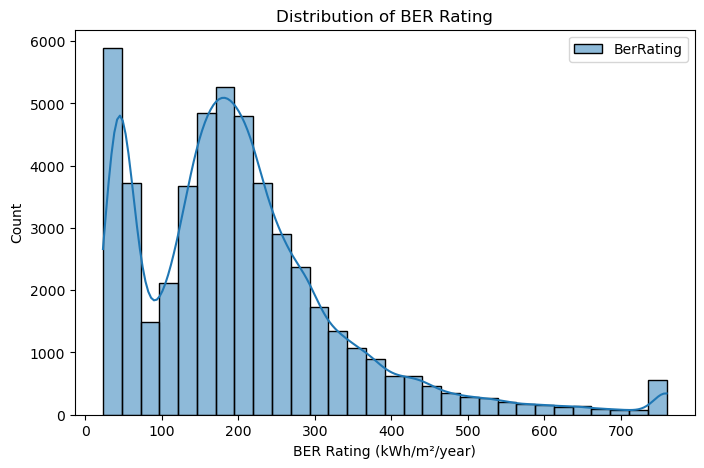

Descriptive statistics of BER Rating:
          BerRating
count  50000.000000
mean     203.720450
std      137.589048
min       23.029800
25%      114.300000
50%      185.580000
75%      259.262500
max      759.640200


In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df[target_col], bins=30, kde=True, color='skyblue')
plt.title('Distribution of BER Rating')
plt.xlabel('BER Rating (kWh/m²/year)')
plt.ylabel('Count')
plt.show()

# Optional descriptive stats
desc_stats = df[target_col].describe()
print("Descriptive statistics of BER Rating:")
print(desc_stats)

## -----------------------------------------------------------------------------------------------
**Observations:**  
- The target variable `BerRating` is **numerical**.  
- **Distribution:** Most buildings fall within a mid-range of BER values (approx. 114–259 kWh/m²/year).  
- **Descriptive statistics:**  
  - **Min:** 23.03  
  - **25th percentile:** 114.30  
  - **Median:** 185.58  
  - **75th percentile:** 259.26  
  - **Max:** 759.64  
  - **Mean:** 203.72  
  - **Standard deviation:** 137.59  
- There are a few high-value outliers (~760 kWh/m²/year), but the majority of values are concentrated around the median.  
- **Conclusion:** The distribution is reasonable and **okay to proceed** with feature analysis and modeling.

# 3️. Feature Lookup Import and Overview

**Description:**

In this step, we import the previously prepared `feature_lookup.csv`. This lookup contains **all features in the dataset**, along with their **category, availability, and description**.  

It helps to:  
- Group features by domain or type (e.g., Geometry, Envelope, Heating, Energy, Leakage).  
- Know which features are **easily available** to an assessor or homeowner.  
- Provide short guidance on interpreting high vs. low values.  


In [24]:
feature_lookup_file = r'..\dataset\BER_feature_lookup.csv'  # path to your saved CSV
feature_lookup = pd.read_csv(feature_lookup_file)
print("feature_lookup loaded")

feature_lookup loaded


In [25]:
feature_lookup

,Feature,Category,Availability,Description,High_vs_Low
0,DwellingTypeDescr,Geometry,Easy,"Type of dwelling (e.g., house, apartment)",Varies by type; affects BER based on energy pr...
1,Year_of_Construction,Geometry,Easy,Year the building was constructed,Older buildings usually have higher BER; newer...
2,GroundFloorArea(sq m),Geometry,Easy,Area of the ground floor in square meters,Higher area may increase BER; lower area reduc...
3,GroundFloorArea,Geometry,Easy,Total ground floor area in m²,Higher area may increase BER; lower area reduc...
4,GroundFloorHeight,Geometry,Easy,Height of the ground floor,Higher floor height slightly increases energy ...
5,FirstFloorArea,Geometry,Easy,Area of the first floor in square meters,Higher area may increase BER; lower area reduc...
6,FirstFloorHeight,Geometry,Easy,Height of the first floor,Higher floor height slightly increases energy ...
7,SecondFloorArea,Geometry,Easy,Area of the second floor in square meters,Higher area may increase BER; lower area reduc...
8,SecondFloorHeight,Geometry,Easy,Height of the second floor,Higher floor height slightly increases energy ...
9,WallArea,Geometry,Easy,Total area of walls,Larger wall area may increase energy loss


### 4️. Feature DataFrame Preparation & Feature Type Overview

**Description:**

We prepare a DataFrame containing **only predictive features** by dropping:  
- **ID / Metadata features** (e.g., CountyName, DateOfAssessment)  
- **Leakage features** (e.g., CO2Rating, EnergyRating, BER_bin)  
- **Target column** (`BerRating`)  

Then, we get an overview of **feature types** to guide analysis:
- **Numeric features** → suitable for correlation analysis  
- **Categorical features** → suitable for median difference / box plot analysis


In [26]:
# Drop ID, metadata, and leakage/target features
drop_cols = feature_lookup.loc[
    feature_lookup['Category'].isin(['Identification / Metadata', 'Leakage / Target'])
]['Feature'].tolist()
# Explicitly drop target column
drop_cols.append('BerRating')
print(f"Total columns to drop: {len(drop_cols)}")

Total columns to drop: 12


In [27]:
# Create feature dataframe
df_feature = df.drop(columns=drop_cols, errors='ignore')
print(f"df_feature shape: {df_feature.shape}")

df_feature shape: (50000, 112)


Categorical columns: 27
Numerical columns: 85


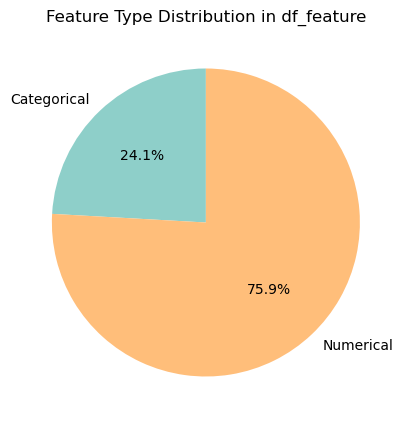

In [28]:
# Identify categorical and numerical columns
cat_cols = df_feature.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df_feature.select_dtypes(include=['number']).columns.tolist()

print(f"Categorical columns: {len(cat_cols)}")
print(f"Numerical columns: {len(num_cols)}")

# Pie chart for feature type distribution
plt.figure(figsize=(5,5))
plt.pie(
    [len(cat_cols), len(num_cols)],
    labels=['Categorical', 'Numerical'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#8ECFC9', '#FFBE7A']
)
plt.title('Feature Type Distribution in df_feature')
plt.show()


## -----------------------------------------------------------------------------------------------
**Observation**

After removing non-predictive columns from categories **Identification / Metadata** and **Leakage / Target**,  
the dataset is now focused only on meaningful predictive variables relevant for energy efficiency modeling.

**Key Points:**
- Dropped non-informative or target-related columns to avoid data leakage and redundancy.
- Retained only features that can contribute to prediction or inference.

**Resulting Feature Composition:**
- **Total predictive features:** 112  
- **Categorical features:** 27  
- **Numerical features:** 85  


### 5️. Numeric Feature Correlation Analysis with BER Rating

In this step, we analyze how each **numerical feature** correlates with the target variable **BER Rating**.  
The correlation coefficient indicates the **strength and direction** of a linear relationship between the variables:
- Positive correlation → Higher values of the feature correspond to higher BER values.
- Negative correlation → Higher values of the feature correspond to lower BER values.

To identify key numeric drivers, we dynamically determine a threshold based on the data distribution instead of setting a fixed value.


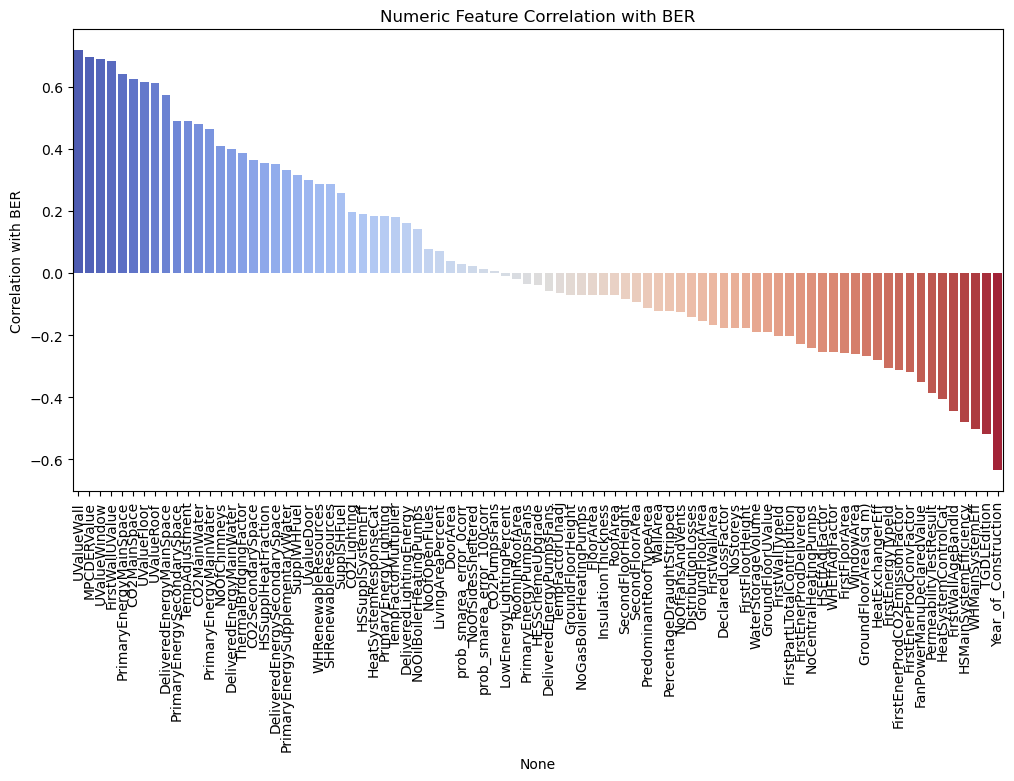

In [31]:
cols_for_corr = list(set(num_cols + ['BerRating']))
# Compute correlation matrix
corr_matrix = df[cols_for_corr].corr()
# Extract correlations with BER only
corr = corr_matrix['BerRating'].drop('BerRating')  # remove self-correlation
corr = corr.sort_values(ascending=False)

# Plot correlation distribution
plt.figure(figsize=(12,6))
sns.barplot(x=corr.index, y=corr.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.ylabel('Correlation with BER')
plt.title('Numeric Feature Correlation with BER')
plt.show()

In [32]:
# Dynamic threshold based on distribution (mean + std of absolute correlations)
mean_corr = abs(corr).mean()
std_corr = abs(corr).std()
threshold = mean_corr + std_corr

print(f"Dynamic correlation threshold (mean + std): {threshold:.2f}")

Dynamic correlation threshold (mean + std): 0.46


In [33]:
high_corr_features = corr[abs(corr) >= threshold].sort_values(ascending=False)
print(f"Number of numeric features with |correlation| ≥ {threshold:.2f}: {len(high_corr_features)}")
# Display each feature and its correlation
print("Highly correlated numeric features with BER (dynamic threshold):")
for feature, value in high_corr_features.items():
    print(f"{feature}: {value:.2f}")

Number of numeric features with |correlation| ≥ 0.46: 16
Highly correlated numeric features with BER (dynamic threshold):
UValueWall: 0.72
MPCDERValue: 0.70
UValueWindow: 0.69
FirstWallUValue: 0.68
PrimaryEnergyMainSpace: 0.64
CO2MainSpace: 0.62
UValueFloor: 0.62
UValueRoof: 0.61
DeliveredEnergyMainSpace: 0.57
PrimaryEnergySecondarySpace: 0.49
TempAdjustment: 0.49
CO2MainWater: 0.48
HSMainSystemEfficiency: -0.48
WHMainSystemEff: -0.50
TGDLEdition: -0.52
Year_of_Construction: -0.64


In [34]:
# Merge correlation results with feature lookup
corr_df = pd.DataFrame({
    'Feature': corr.index,
    'CorrelationWithBER': corr.values
}).reset_index(drop=True)

# Merge with feature lookup to get category info
corr_with_cat = corr_df.merge(feature_lookup[['Feature', 'Category']], on='Feature', how='left')

# Compute mean absolute correlation per category
category_corr = (
    corr_with_cat.groupby('Category')['CorrelationWithBER']
    .apply(lambda x: x.abs().mean())
    .reset_index()
    .sort_values(by='CorrelationWithBER', ascending=False)
)

# Display ranked categories
print("Average absolute correlation by feature category:")
display(category_corr)

Average absolute correlation by feature category:


,Category,CorrelationWithBER
5,Heating / Mechanical System,0.607318
15,Space Heating,0.507097
17,Water Heating,0.418336
2,Envelope,0.400112
7,Heating Efficiency,0.319517
16,Ventilation,0.302648
6,Heating Control,0.295056
8,Heating Fuel,0.286399
1,Energy Type,0.274449
9,Hot Water,0.228157


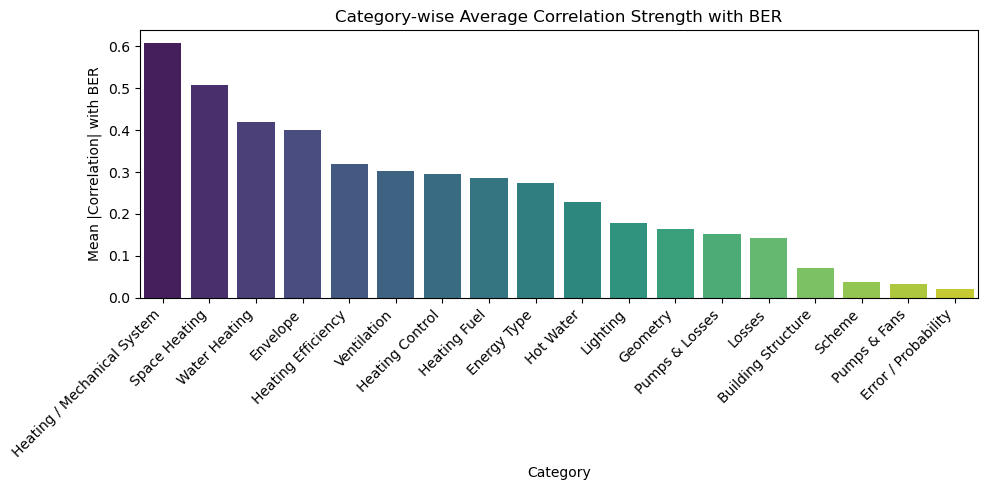

In [35]:
# Plot category-wise average correlation
plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='CorrelationWithBER', data=category_corr, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean |Correlation| with BER')
plt.title('Category-wise Average Correlation Strength with BER')
plt.tight_layout()
plt.show()

## -----------------------------------------------------------------------------------------------
**Observations:**  
The correlation analysis shows that heating and mechanical system–related variables have the highest average influence on BER values.
Space heating and water heating features also show relatively strong correlations (around 0.50 and 0.42 respectively), followed by insulation or envelope-related parameters (0.40). These categories are directly tied to energy loss and thermal comfort, which explains their influence on BER.

Geometric and structural parameters, such as floor area or height, show weaker correlations (around 0.16), suggesting that physical size and shape alone are not strong determinants of BER when compared to thermal or mechanical efficiency.

The most strongly correlated numeric features (|r| ≥ 0.46) include:
- **Positively correlated (higher value → higher BER → lower efficiency):**  
  UValueWall (0.72), MPCDERValue (0.70), UValueWindow (0.69), FirstWallUValue (0.68), PrimaryEnergyMainSpace (0.64), CO2MainSpace (0.62), UValueFloor (0.62), UValueRoof (0.61), DeliveredEnergyMainSpace (0.57)
- **Negatively correlated (higher value → lower BER → higher efficiency):**  
  Year_of_Construction (-0.64), TGDLEdition (-0.52), WHMainSystemEff (-0.50), HSMainSystemEfficiency (-0.48)

Overall, newer buildings with higher heating efficiency and better insulation tend to have lower BER values, confirming the importance of system efficiency and building envelope quality in energy performance.


### 6. Categorical Feature Analysis with BER Rating

In this step, we examine how each **categorical feature** relates to the target variable **BER Rating**.  
We use box plots to visualize the distribution of BER across categories, which helps highlight potential high-impact features.  

To quantify feature impact, we calculate the **median difference** of BER values across categories.  
- Features with larger median differences are likely more influential on BER.
- A **dynamic threshold** based on the mean of all median differences is used to identify high-impact categorical features."

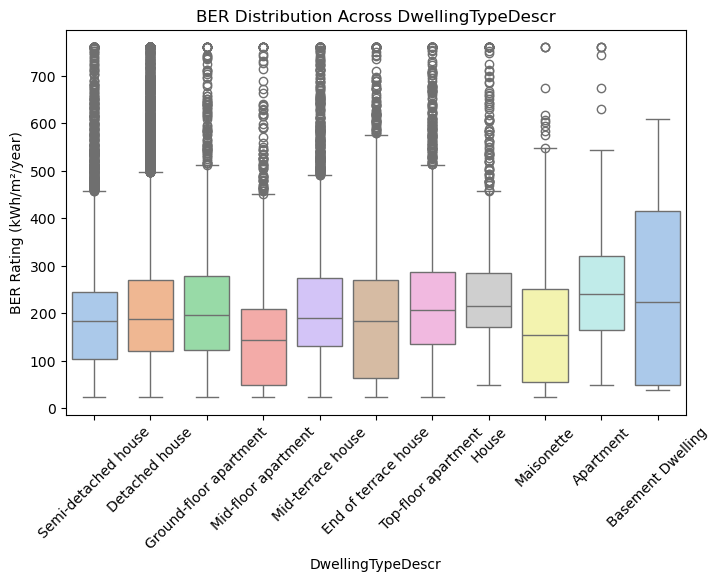

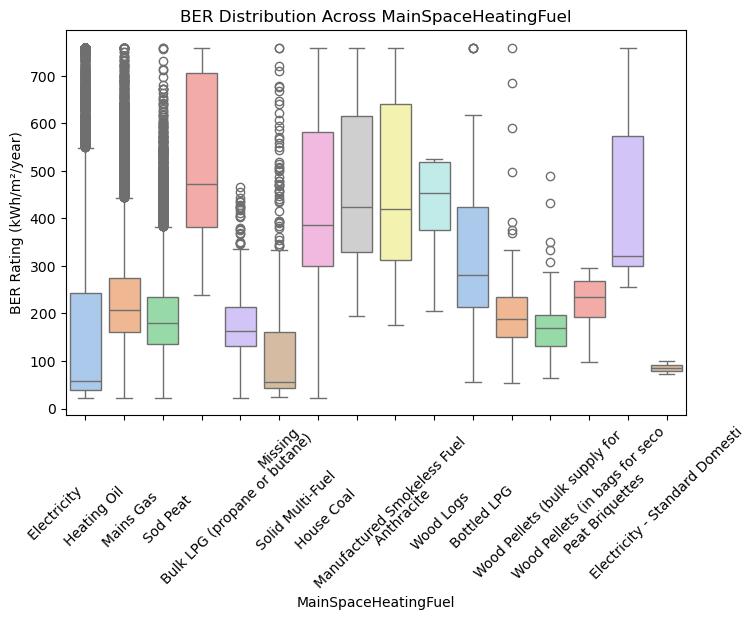

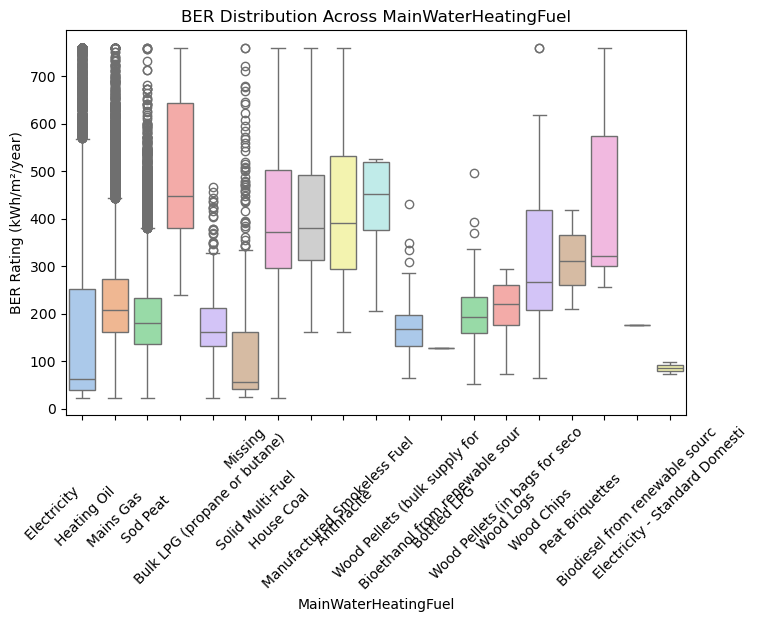

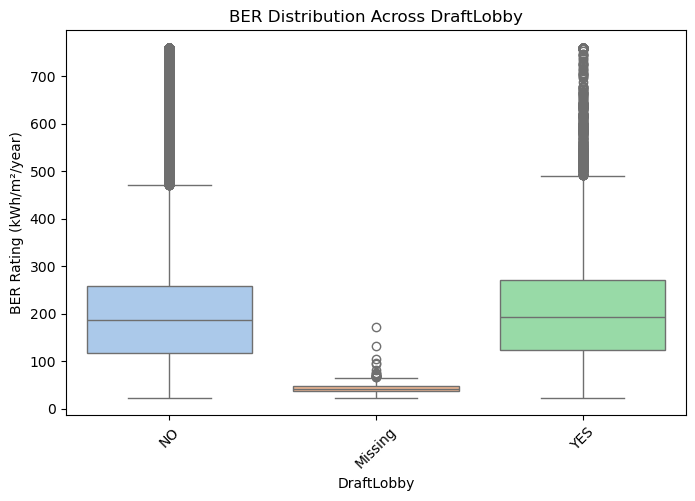

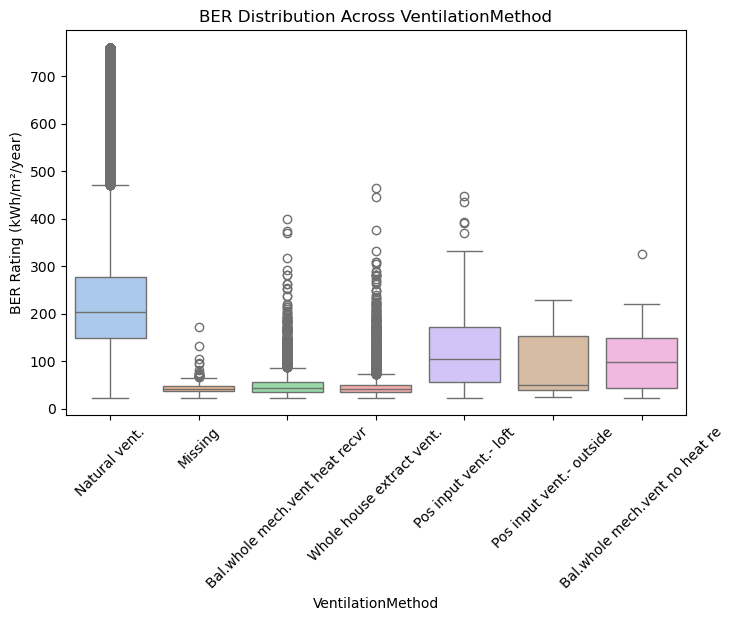

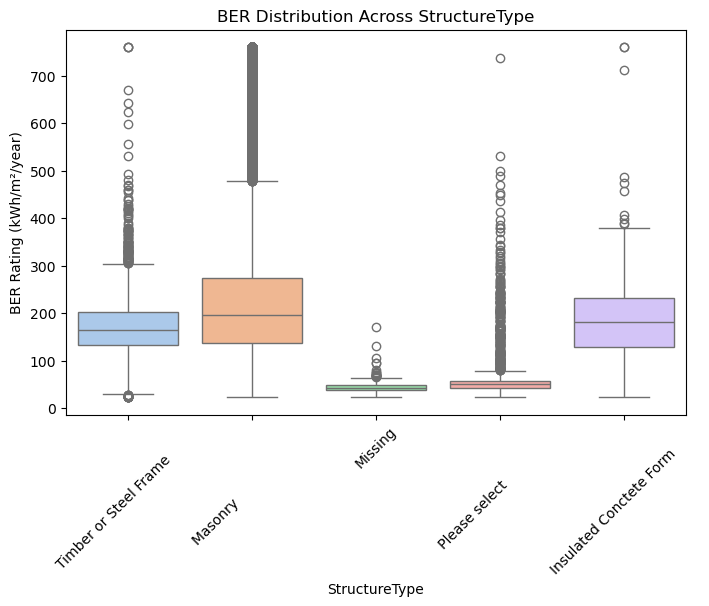

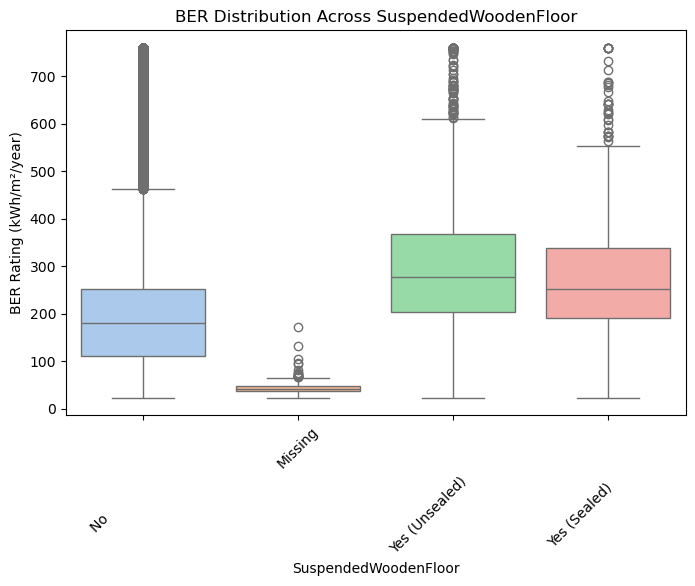

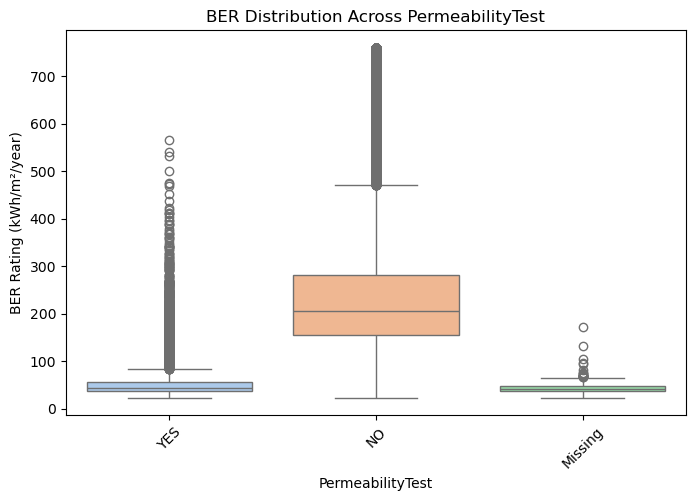

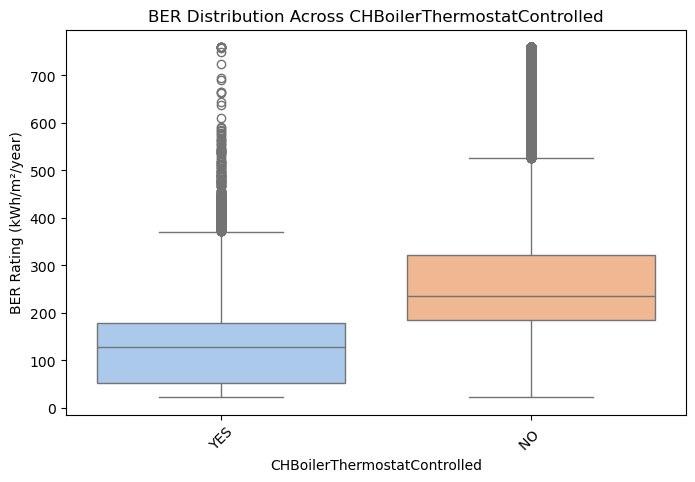

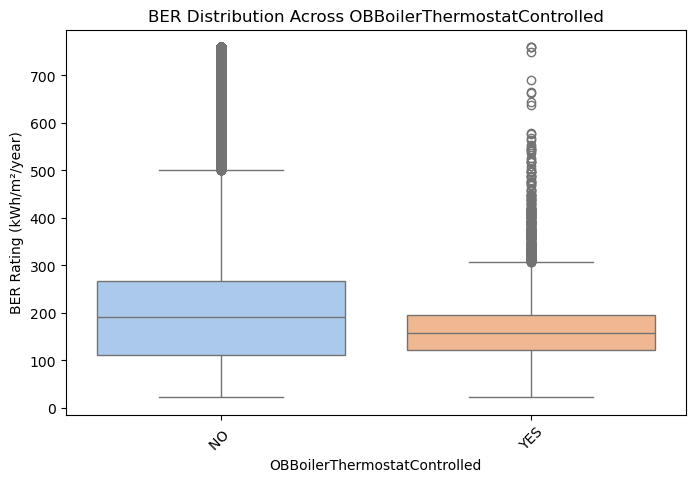

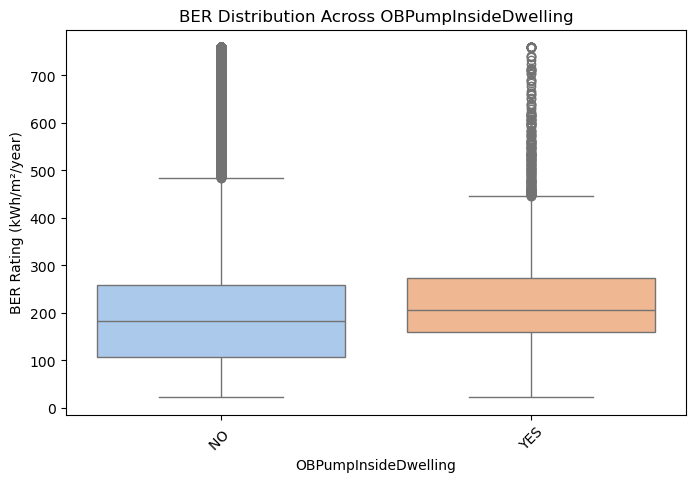

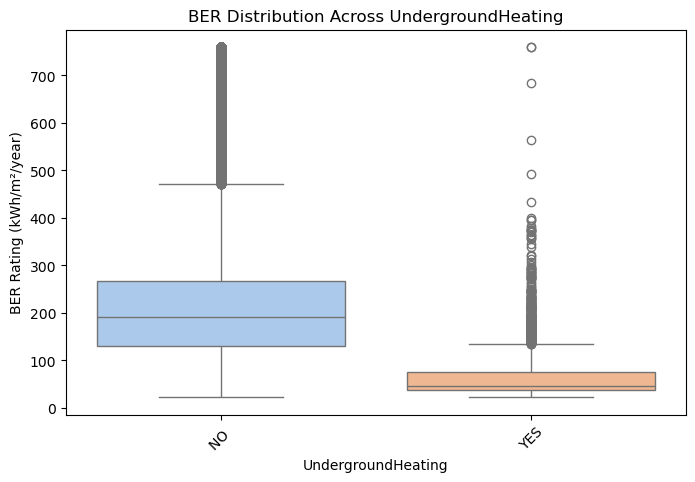

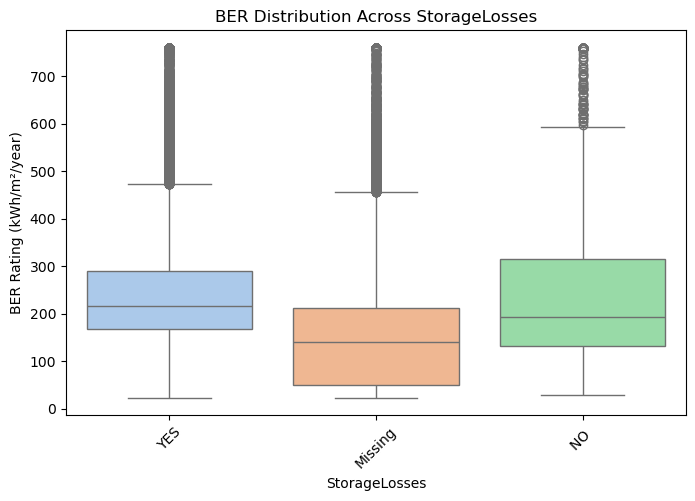

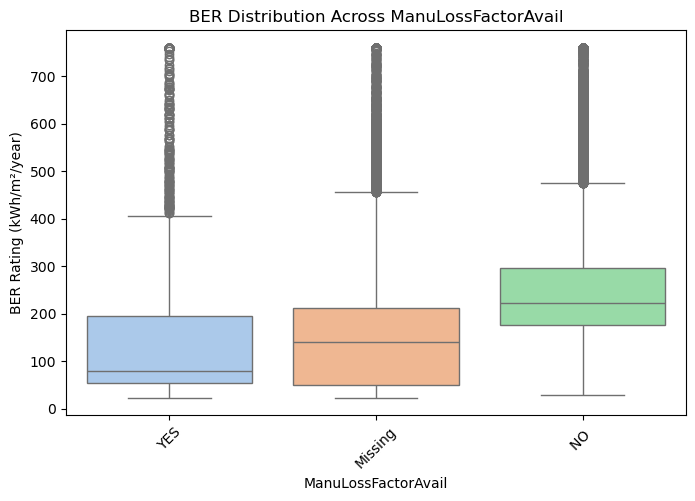

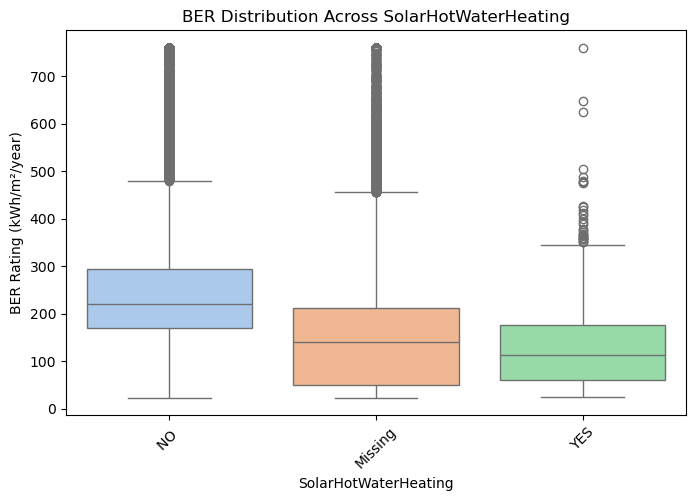

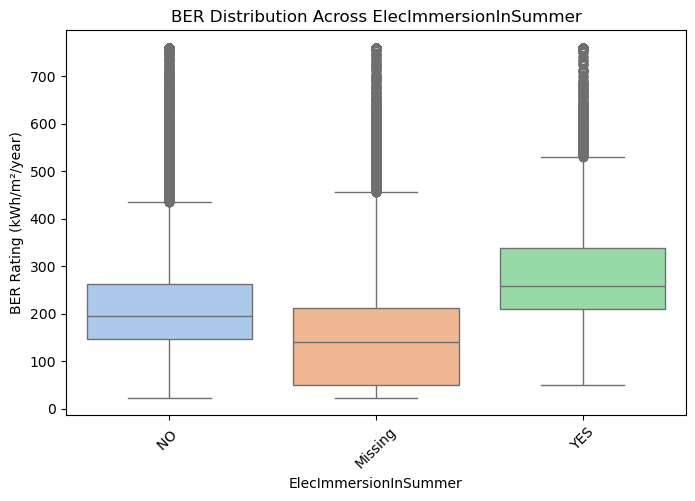

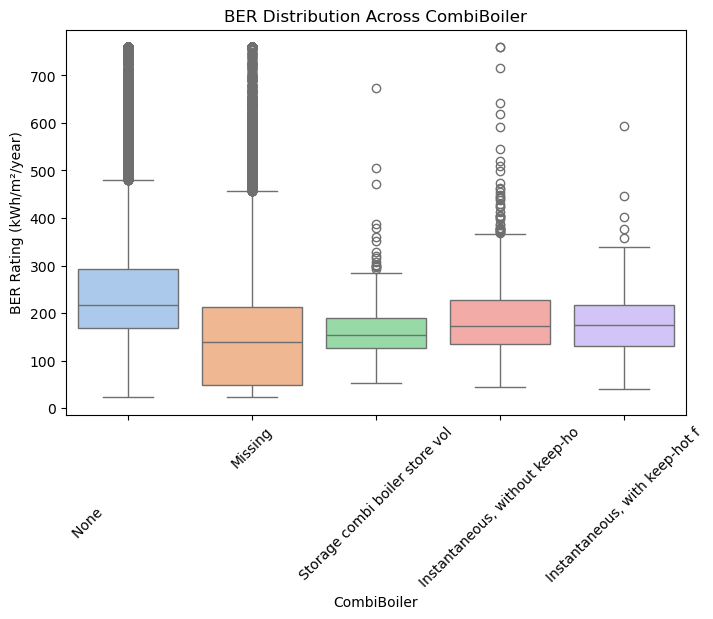

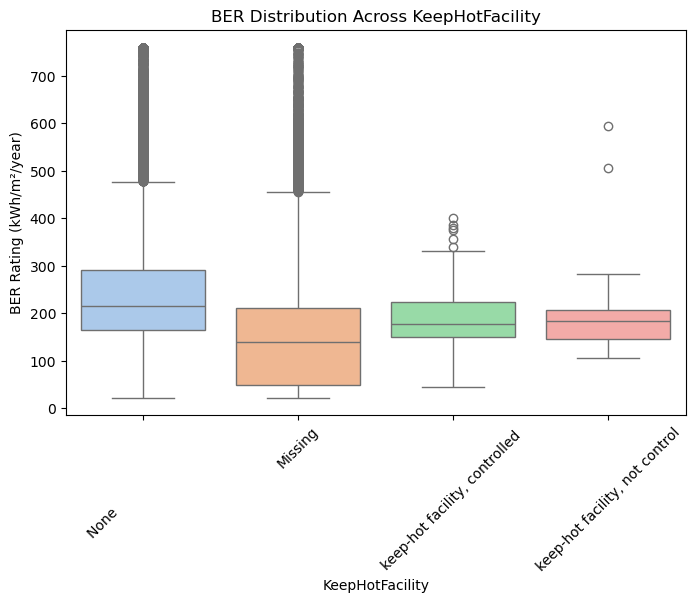

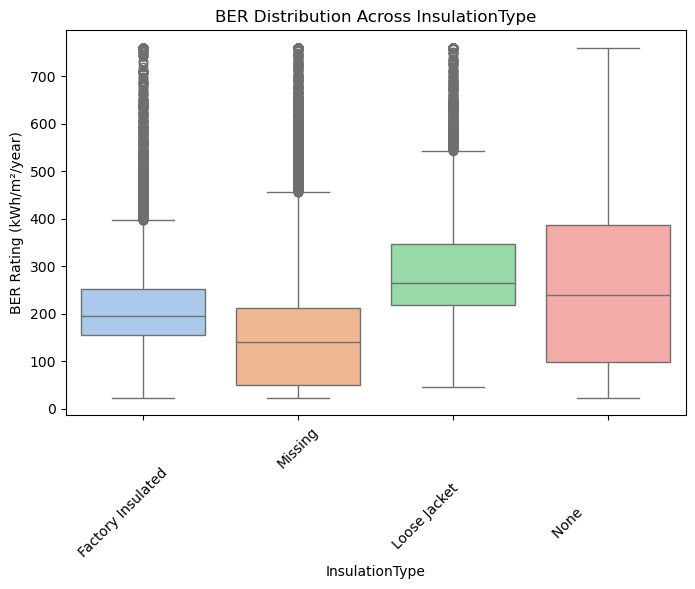

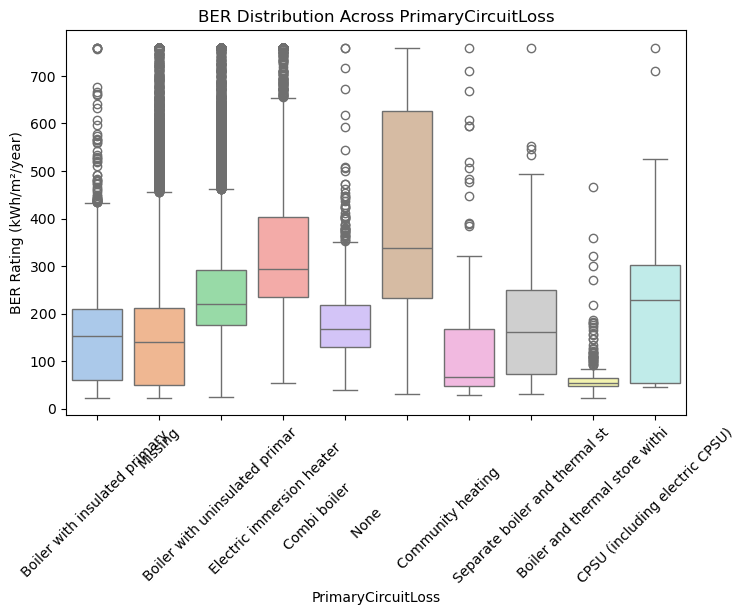

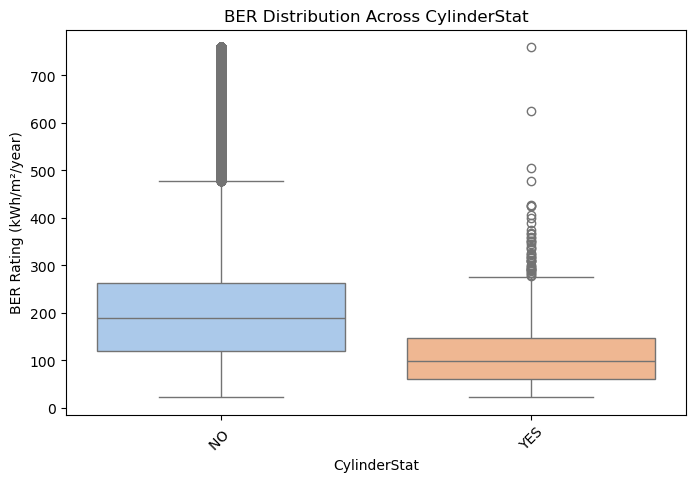

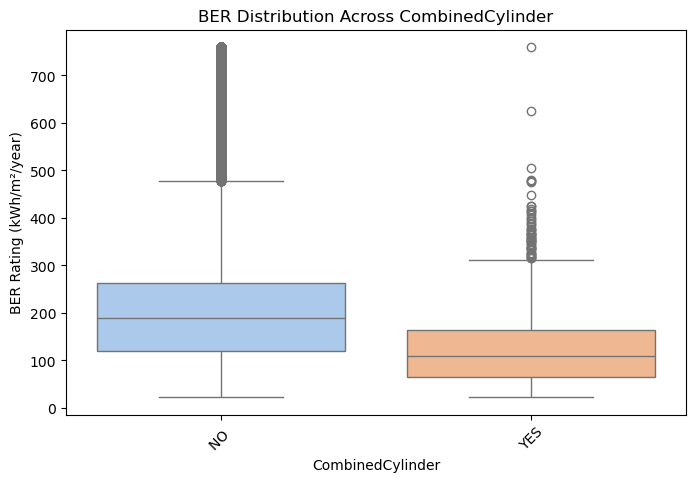

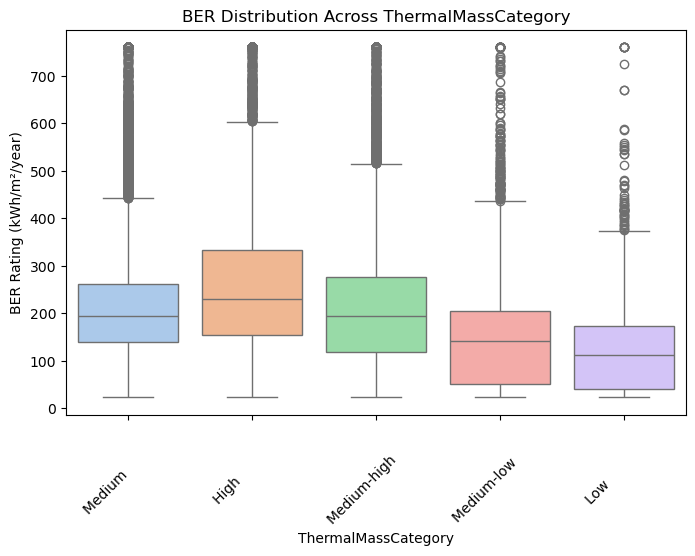

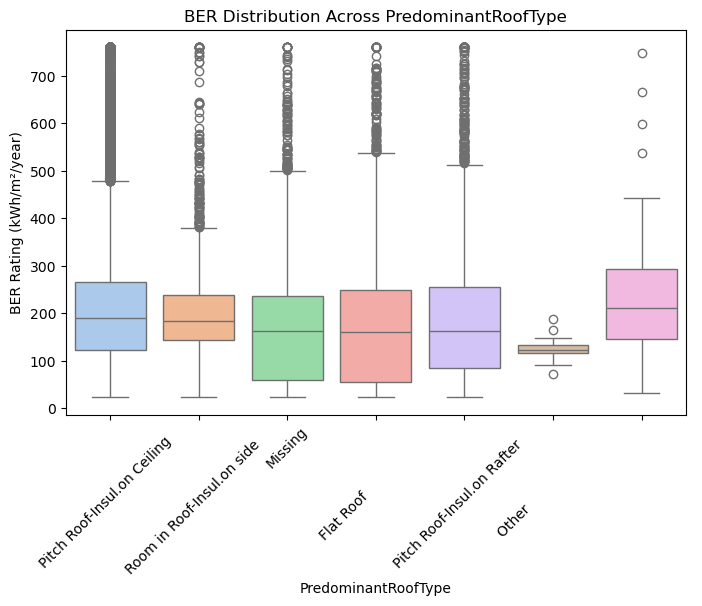

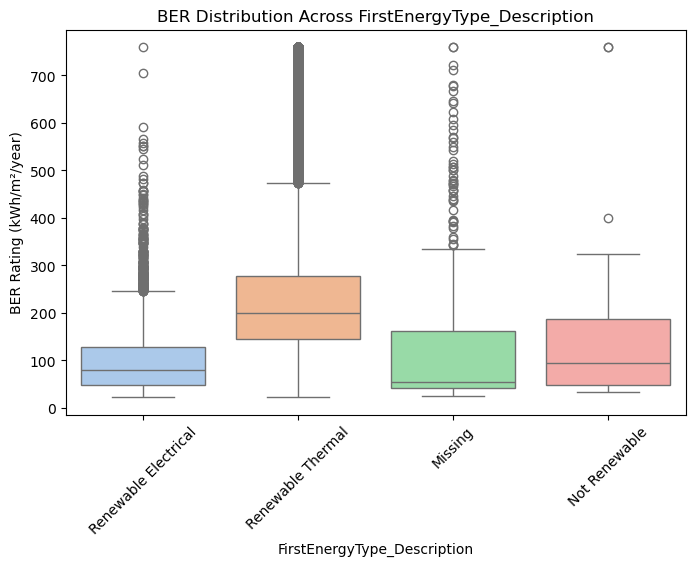

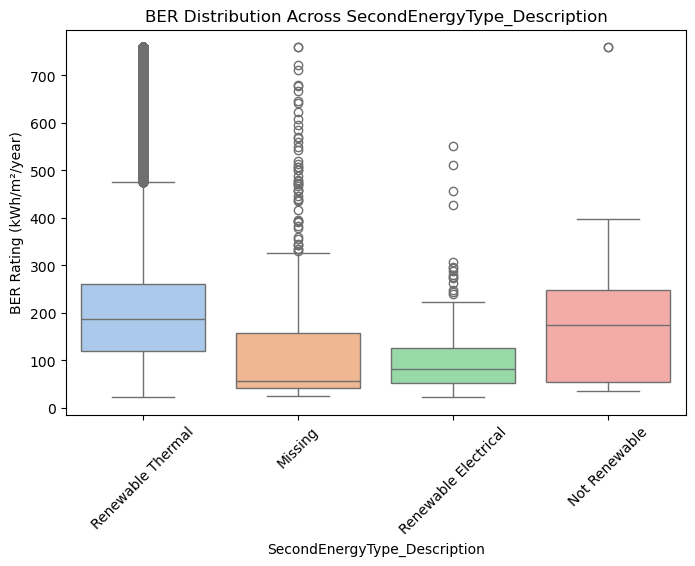

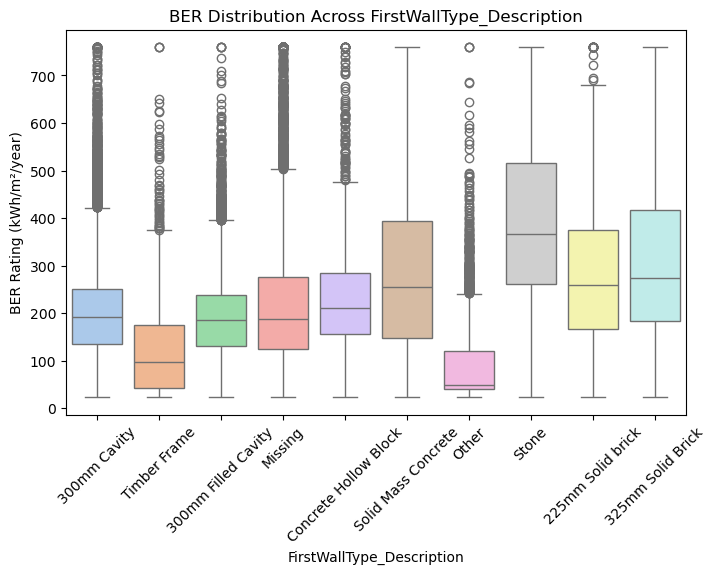

In [36]:
# Box plots for each categorical feature
for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col], y=df['BerRating'], palette='pastel')
    plt.xticks(rotation=45)
    plt.title(f'BER Distribution Across {col}')
    plt.ylabel('BER Rating (kWh/m²/year)')
    plt.xlabel(col)
    plt.show()

In [44]:
# Compute median differences for each categorical feature
cat_median_diff = {}
for col in cat_cols:
    medians = df.groupby(col)['BerRating'].median()
    diff = medians.max() - medians.min()
    cat_median_diff[col] = diff

cat_median_diff = pd.Series(cat_median_diff).sort_values(ascending=False)

In [45]:
# Dynamic threshold: mean of median differences
threshold = cat_median_diff.mean()
print(f"Dynamic threshold (mean of median differences) = {threshold:.2f}\n")

Dynamic threshold (mean of median differences) = 150.46



In [46]:
high_impact_cat = cat_median_diff[cat_median_diff >= threshold]

print(f"Number of high-impact categorical features (median difference ≥ {threshold:.2f}): {len(high_impact_cat)}\n")
print("High-impact categorical features based on median difference:")
for col, diff in high_impact_cat.items():
    print(f"{col}: median difference = {diff:.2f}")

Number of high-impact categorical features (median difference ≥ 150.46): 8

High-impact categorical features based on median difference:
MainSpaceHeatingFuel: median difference = 416.86
MainWaterHeatingFuel: median difference = 397.12
FirstWallType_Description: median difference = 317.09
PrimaryCircuitLoss: median difference = 285.56
SuspendedWoodenFloor: median difference = 234.19
PermeabilityTest: median difference = 163.92
VentilationMethod: median difference = 160.93
StructureType: median difference = 154.06


In [47]:
# Map each feature to its category (from feature lookup)
feature_cat_map = feature_lookup.set_index('Feature')['Category'].to_dict()

# Create DataFrame for all categorical features
cat_feature_df = pd.DataFrame({
    'Feature': cat_cols,
    'MedianDiff': [cat_median_diff[f] for f in cat_cols],
})
cat_feature_df['Category'] = cat_feature_df['Feature'].map(feature_cat_map)

# Compute average median difference per category
category_median_diff = cat_feature_df.groupby('Category')['MedianDiff'].mean().sort_values(ascending=False)

# Print category-wise averages
print("Average median difference per category:")
for cat, val in category_median_diff.items():
    print(f"{cat}: {val:.2f}")

Average median difference per category:
Heating Fuel: 406.99
Building Structure: 194.12
Envelope: 162.13
Ventilation: 158.14
Energy Type: 137.53
Hot Water: 119.44
Losses: 110.40
Geometry: 95.51
Pumps & Losses: 77.46


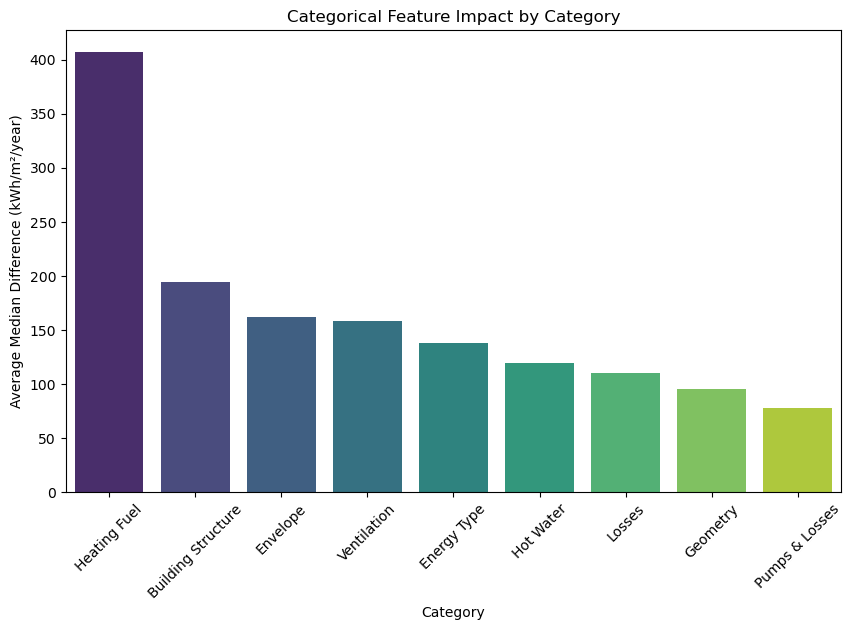

In [48]:
# Bar plot for overall category impact
plt.figure(figsize=(10,6))
sns.barplot(x=category_median_diff.index, y=category_median_diff.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Average Median Difference (kWh/m²/year)')
plt.title('Categorical Feature Impact by Category')
plt.show()

**Observation:**  

From the categorical analysis, we see that features related to **heating, building structure, and envelope** tend to have larger differences in BER medians across their values. This suggests that these types of categorical variables may have a stronger impact on the BER rating compared to others. Overall, the plot shows which categories of features are generally more influential.


In [49]:
# Save the prepared feature dataframe for later use in modeling
df_feature.to_csv(r'..\dataset\BER_Features_Prepared.csv', index=False)
print("Feature dataframe saved as CSV for modeling and feature selection.")

Feature dataframe saved as CSV for modeling and feature selection.
